# Sentiment Analysis on Reddit News Headlines


In [0]:
#for google colab 
#pip install nltk
#!pip install -q praw

In [2]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import praw

reddit = praw.Reddit(client_id='sO3cNV605NVxMw',
                     client_secret='dIRRNUsOE6OzjIx51cGleEhDcvg',
                     user_agent='TechLabs')

In [0]:
headlines = set()

In this section, the topics variable will be defined by the survey that will be conducted to each user.

In [5]:
topic1 = 'excercise'
topic2 = 'read'
topic3 = 'movies'

try:
  for submission in reddit.subreddit(topic1).new(limit=None):
      headlines.add(submission.title)
      display.clear_output()
except:
  print('Topic one not found, try again')
try:  
  for submission in reddit.subreddit(topic2).new(limit=None):
      headlines.add(submission.title)
      display.clear_output()
except:
  print('Topic two not found, try again')
try:    
  for submission in reddit.subreddit(topic3).new(limit=None):
      headlines.add(submission.title)
      display.clear_output()
except:
  print('Topic three not found, try again')

print(len(headlines))

987


In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
nltk.download('vader_lexicon')

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[{'compound': 0.0,
  'headline': '‘Death Proof’ (2007) is my favourite Quentin Tarantino film',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.4019,
  'headline': 'I need help finding the title of a movie.',
  'neg': 0.0,
  'neu': 0.69,
  'pos': 0.31},
 {'compound': 0.0,
  'headline': 'Nutrition and Exercise: Timing is Everything',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [7]:
dfs = pd.DataFrame.from_records(results)
dfs

,neg,neu,pos,compound,headline
0,0.000,1.000,0.000,0.0000,‘Death Proof’ (2007) is my favourite Quentin T...
1,0.000,0.690,0.310,0.4019,I need help finding the title of a movie.
2,0.000,1.000,0.000,0.0000,Nutrition and Exercise: Timing is Everything
3,0.467,0.533,0.000,-0.5423,What makes unbalanced Movie bad?
4,0.000,1.000,0.000,0.0000,"Could I get your thoughts on ""Computational St..."
...,...,...,...,...,...
982,0.000,1.000,0.000,0.0000,New on Streaming Official Discussion Megathrea...
983,0.000,0.656,0.344,0.4847,Why superheroes don't die permanently in film?
984,0.000,1.000,0.000,0.0000,Looking for films similar to Bone Tomahawk
985,0.389,0.611,0.000,-0.7906,"Fifteen years on, how does Star Wars: Revenge ..."


In [9]:
dfs['label'] = 0
dfs.loc[dfs['compound'] > 0.2, 'label'] = 1
dfs.loc[dfs['compound'] < -0.2, 'label'] = -1
dfs

,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.000,0.0000,‘Death Proof’ (2007) is my favourite Quentin T...,0
1,0.000,0.690,0.310,0.4019,I need help finding the title of a movie.,1
2,0.000,1.000,0.000,0.0000,Nutrition and Exercise: Timing is Everything,0
3,0.467,0.533,0.000,-0.5423,What makes unbalanced Movie bad?,-1
4,0.000,1.000,0.000,0.0000,"Could I get your thoughts on ""Computational St...",0
...,...,...,...,...,...,...
982,0.000,1.000,0.000,0.0000,New on Streaming Official Discussion Megathrea...,0
983,0.000,0.656,0.344,0.4847,Why superheroes don't die permanently in film?,1
984,0.000,1.000,0.000,0.0000,Looking for films similar to Bone Tomahawk,0
985,0.389,0.611,0.000,-0.7906,"Fifteen years on, how does Star Wars: Revenge ...",-1


In [0]:
df2 = dfs[['headline', 'label']]

In [0]:
df2.to_csv('reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)

In [12]:
dfs.label.value_counts()

 0    476
 1    353
-1    158
Name: label, dtype: int64

In [13]:
print("Positive headlines:\n")
pprint(list(dfs[dfs['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(dfs[dfs['label'] == -1].headline)[:5], width=200)

Positive headlines:

['I need help finding the title of a movie.', 'Is this a good workout routine with MMA?', 'The best books app', 'Dreams Go By', 'I think this would be pretty cool.']

Negative headlines:

['What makes unbalanced Movie bad?',
 'Suspense-Thrillers movies and an example of why one is bad.',
 "'Back to the Future' Writer Asks Universal to Destroy Censored Version of Sequel",
 'made an edit, Wrapped in Piano String + A Ghost Story',
 'Rejecting toxic female nerdom in Labyrinth']


In [14]:
dfs.label.value_counts(normalize=True) * 100

 0    48.226950
 1    35.764944
-1    16.008105
Name: label, dtype: float64

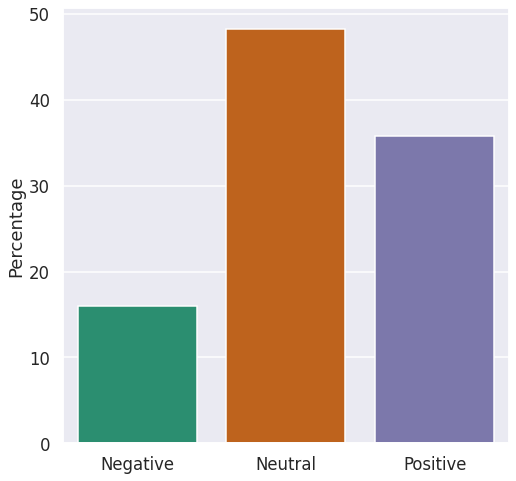

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = dfs.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [16]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
nltk.download('punkt')

example = "This is an example sentence! However, it isn't a very informative one"

print(word_tokenize(example, language='english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one']


In [17]:
tokenizer = RegexpTokenizer(r'\w+')
print(tokenizer.tokenize(example))

['This', 'is', 'an', 'example', 'sentence', 'However', 'it', 'isn', 't', 'a', 'very', 'informative', 'one']


In [18]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = stopwords.words('english')
print(stop_words[:20])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [0]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        line = line.lower()
        toks = tokenizer.tokenize(line)
        toks = [t for t in toks if t not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [20]:
pos_lines = list(dfs[dfs.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('movie', 72),
 ('best', 45),
 ('movies', 45),
 ('help', 41),
 ('film', 27),
 ('good', 22),
 ('like', 21),
 ('please', 19),
 ('one', 19),
 ('need', 18),
 ('read', 18),
 ('favorite', 16),
 ('time', 14),
 ('finding', 13),
 ('would', 13),
 ('free', 13),
 ('love', 12),
 ('films', 12),
 ('story', 12),
 ('watch', 11)]

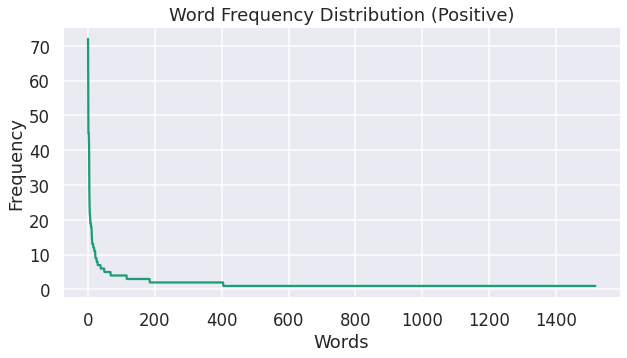

In [21]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

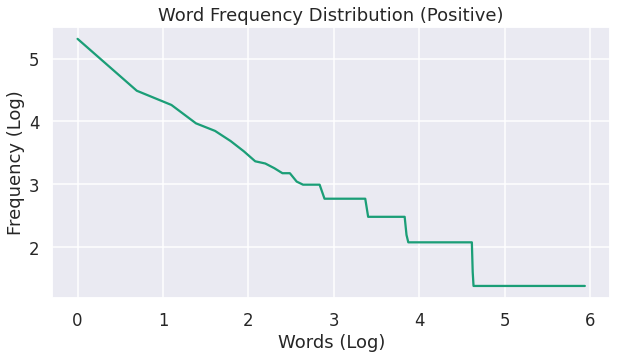

In [22]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [23]:
neg_lines = list(df2[df2.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('movie', 21),
 ('movies', 17),
 ('film', 11),
 ('horror', 11),
 ('war', 9),
 ('bad', 8),
 ('films', 7),
 ('first', 6),
 ('dead', 6),
 ('back', 5),
 ('good', 5),
 ('watching', 5),
 ('furious', 5),
 ('one', 4),
 ('low', 4),
 ('trailer', 4),
 ('watch', 4),
 ('10', 4),
 ('people', 4),
 ('starring', 4)]

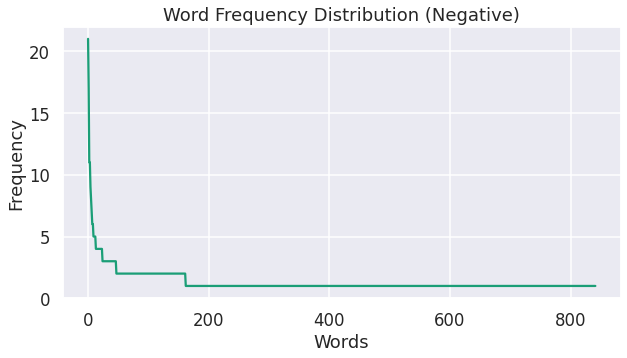

In [24]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

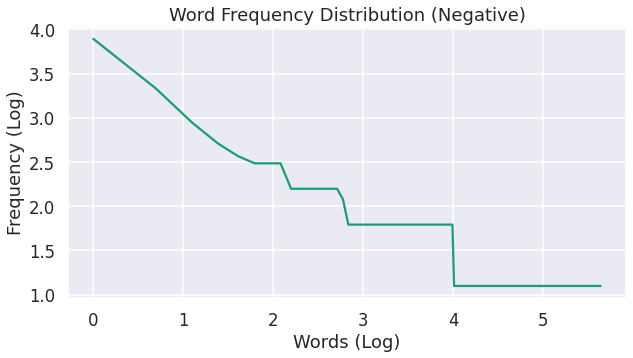

In [25]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()